In [14]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

In [15]:
# Importing cleaned dataset:
wines_dataset = pd.read_csv("wines_final.csv")

# Dropping unnecessary columns:
wines_dataset.drop(columns=["Unnamed: 0",
                            "country",
                            "apellation",
                            "taster_name",
                            "taster_twitter_handle",
                            "title",
                            "variety",
                            "winery",
                            "noble_international",
                            "monovarietal",
                            "taste_alcohol",
                            "primary_flavors",
                            "wine_type"], inplace=True)

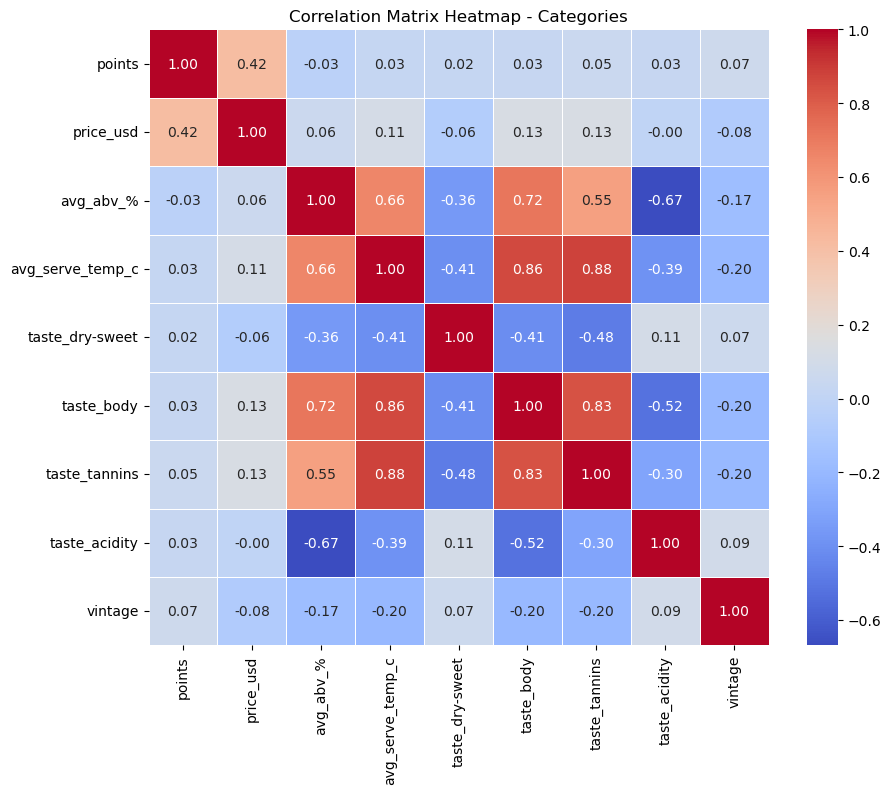

In [16]:
# Correlation matrix between categories:
plt.figure(figsize=(10, 8))
sns.heatmap(wines_dataset.corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidth=0.5,
            cbar=True)
plt.title('Correlation Matrix Heatmap - Categories')

plt.show()

In [17]:
# OLS model (Ordinary Least-Squares):
y = wines_dataset["price_usd"] 
X = wines_dataset.drop(["price_usd"], axis=1)

# y = B0 + B1*X1

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     3381.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:34:12   Log-Likelihood:            -5.5364e+05
No. Observations:              109871   AIC:                         1.107e+06
Df Residuals:                  109862   BIC:                         1.107e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1560.9655     64.883  

In [18]:
# MAPE
residuals = model.resid
y_real = model.model.endog
y_pred = y_real-residuals
mape = np.mean(np.abs((y_real-y_pred)/y_real))*100
print(f"MAPE: {mape:.2f}%")

MAPE: 56.91%


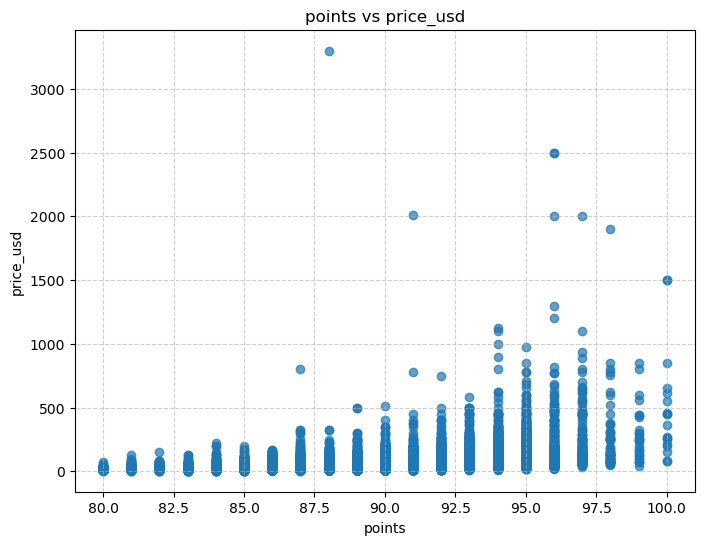

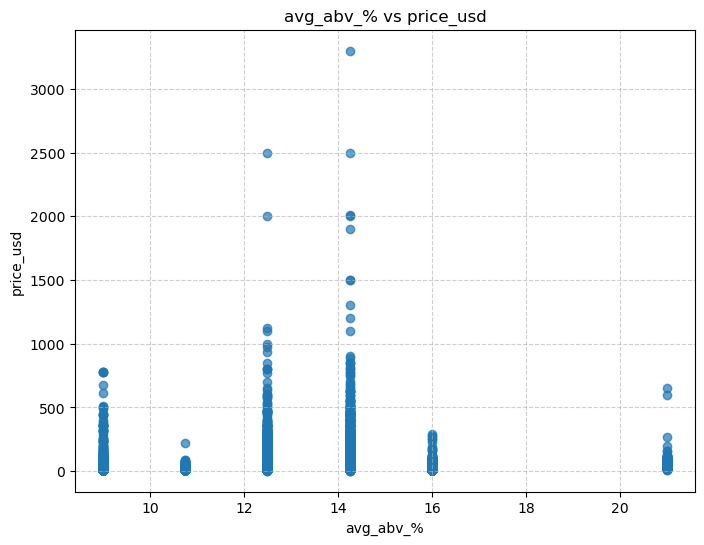

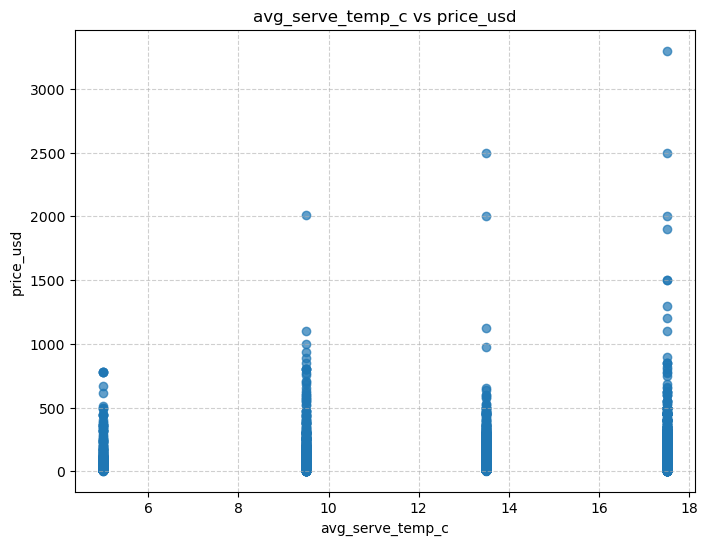

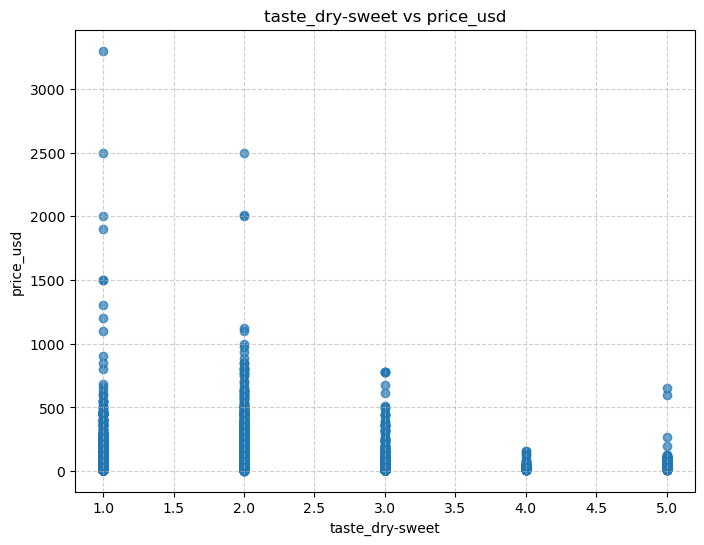

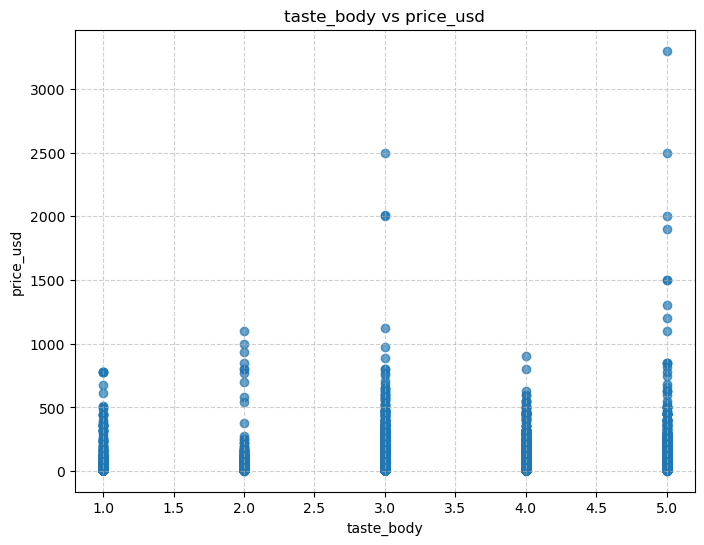

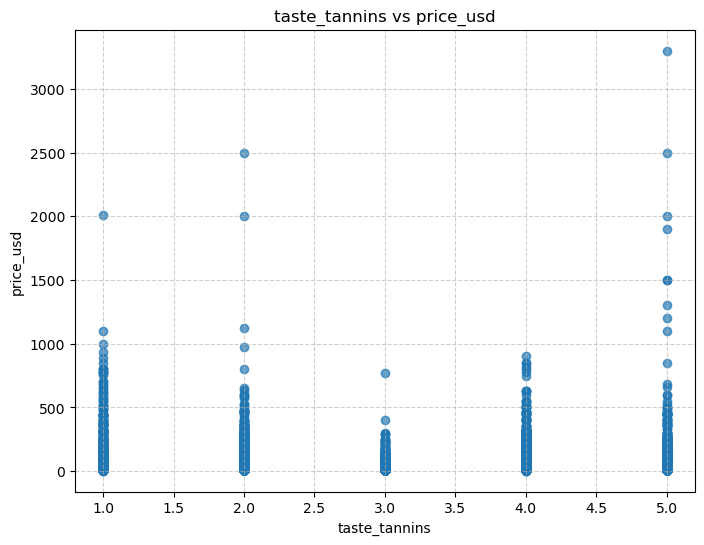

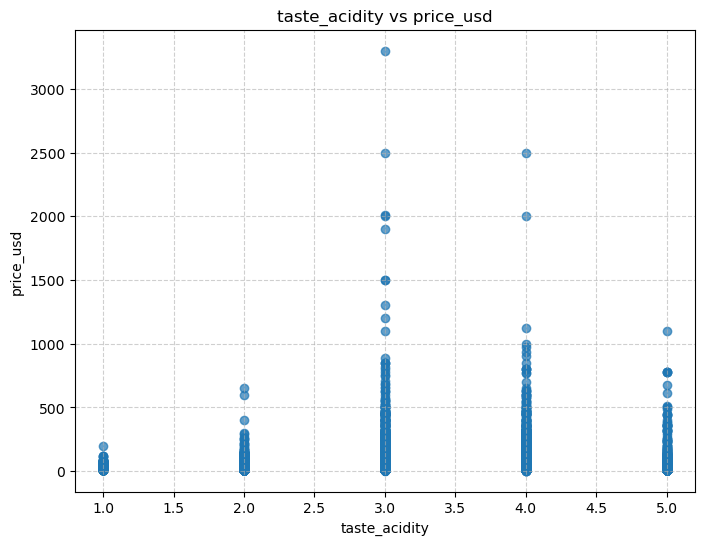

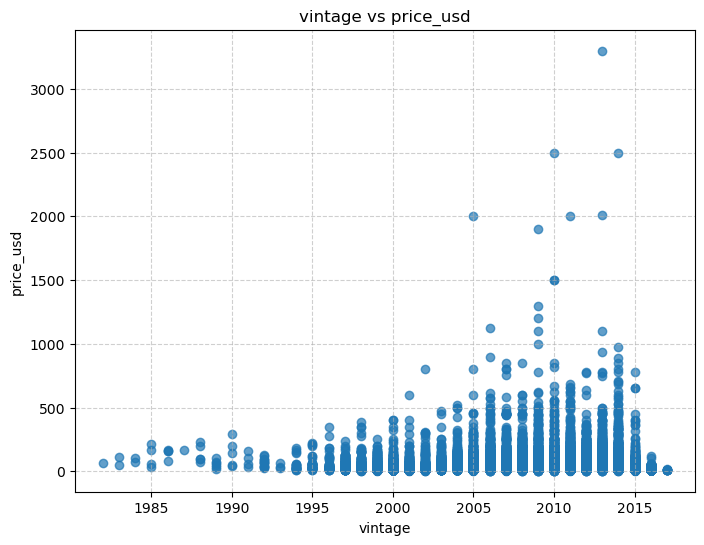

In [19]:
# Scatterplots:
for column in wines_dataset.columns:
    if column != "price_usd":
        plt.figure(figsize=(8,6))
        plt.scatter(wines_dataset[column], wines_dataset["price_usd"], alpha=0.7)
        plt.xlabel(column)
        plt.ylabel("price_usd")
        plt.title(f"{column} vs price_usd")
        plt.grid(True, linestyle="--", alpha=0.6)
        
        plt.show()